Accuracy: 95.00%


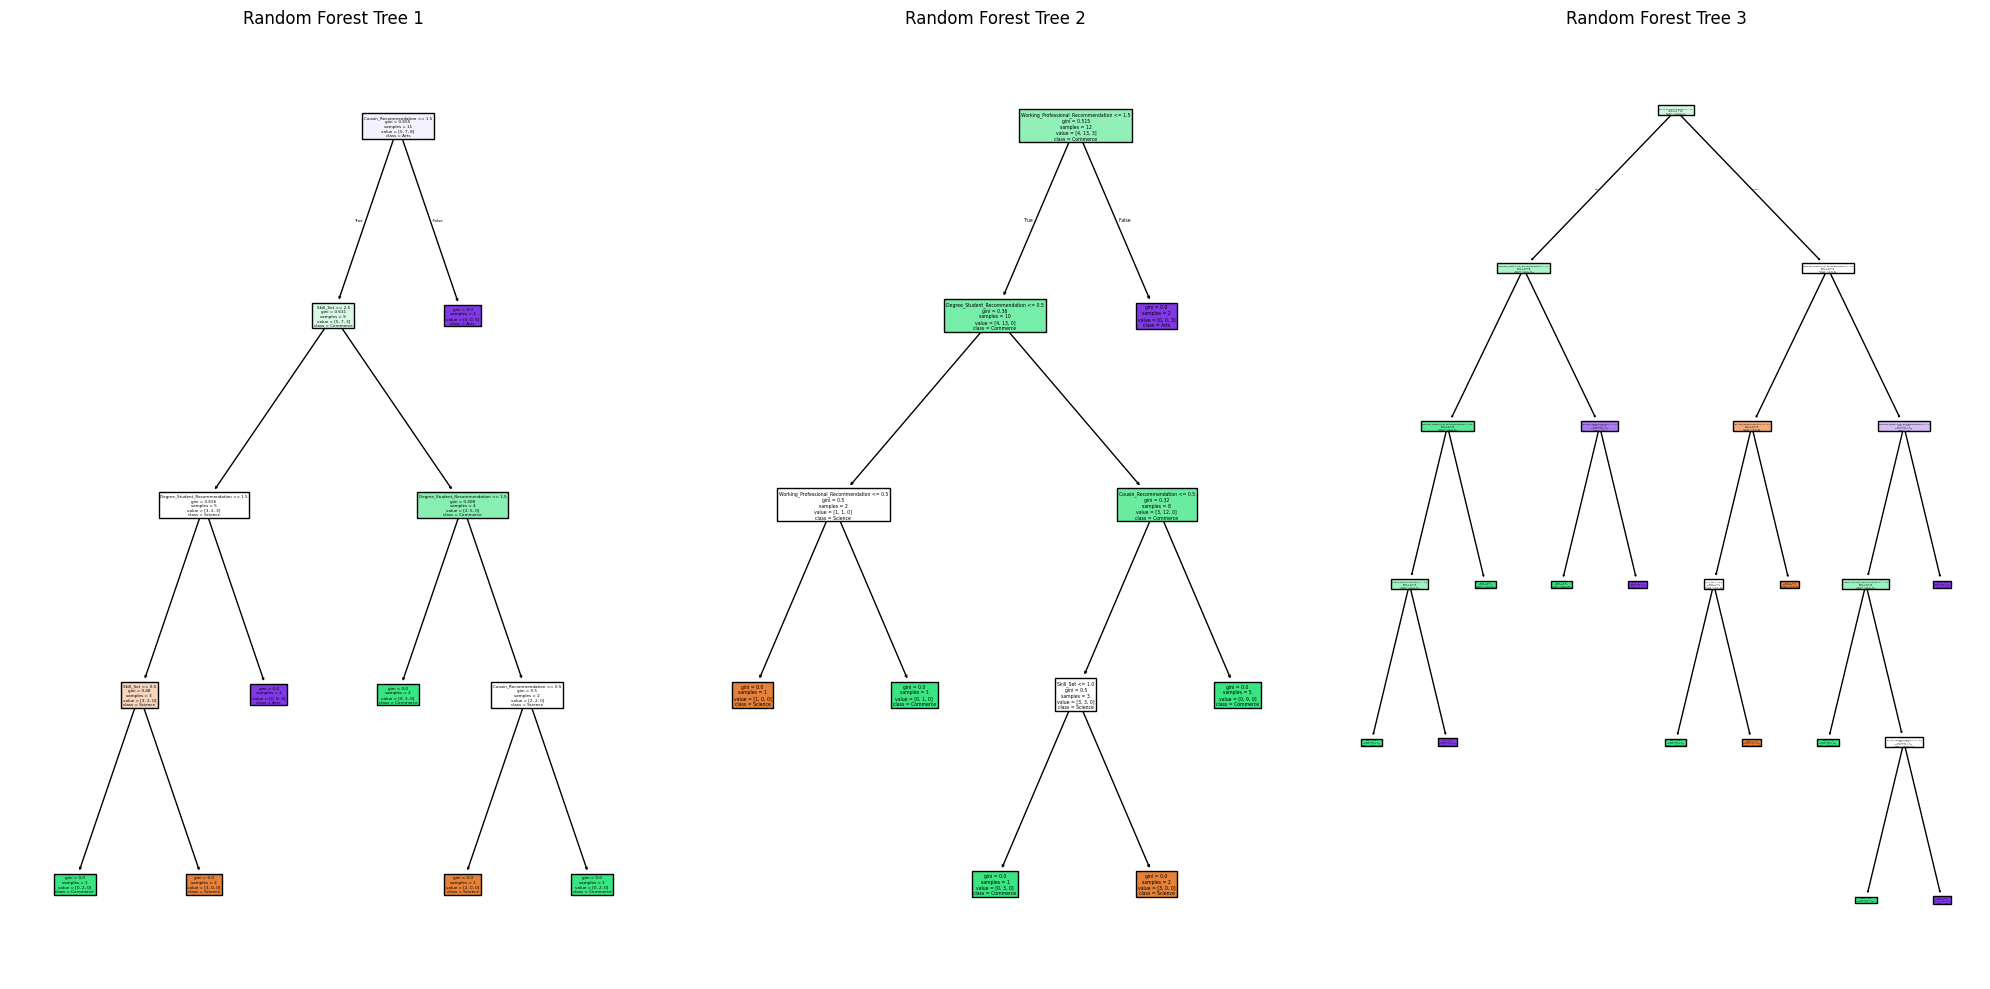

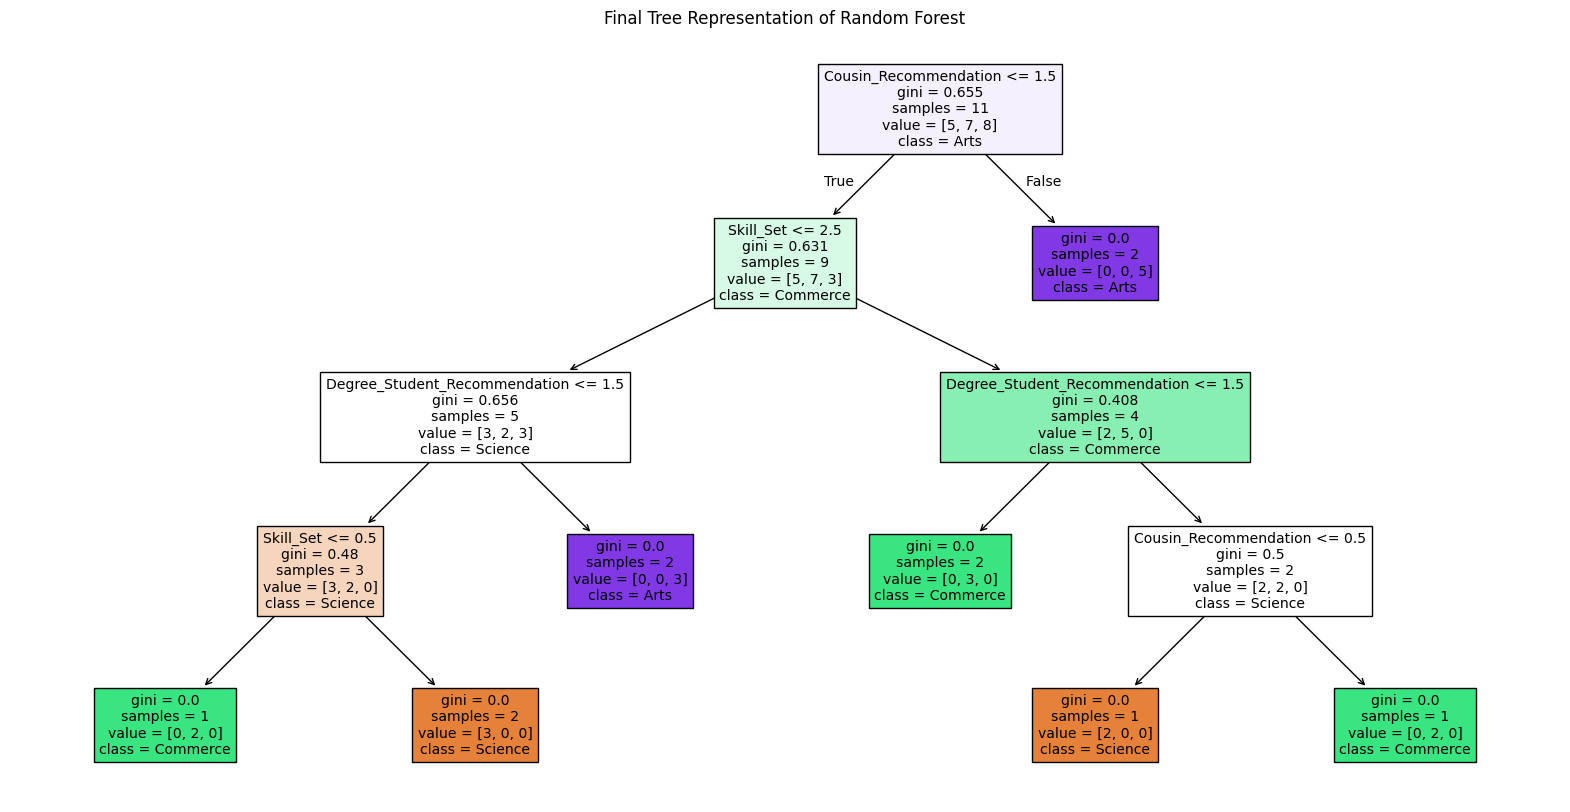

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a structured dataset
data = {
    'Student_ID': range(1, 21),
    'Skill_Set': np.random.choice(['Math', 'Science', 'Art', 'Language', 'Sports'], 20),
    'Cousin_Recommendation': np.random.choice(['Science', 'Commerce', 'Arts'], 20),
    'Teacher_Recommendation': np.random.choice(['Science', 'Commerce', 'Arts'], 20),
    'Parent_Recommendation': np.random.choice(['Science', 'Commerce', 'Arts'], 20),
    'Degree_Student_Recommendation': np.random.choice(['Science', 'Commerce', 'Arts'], 20),
    'Working_Professional_Recommendation': np.random.choice(['Science', 'Commerce', 'Arts'], 20),
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Create Final Course based on recommendations to ensure deterministic behavior
def determine_final_course(row):
    recommendations = [
        row['Cousin_Recommendation'],
        row['Teacher_Recommendation'],
        row['Parent_Recommendation'],
        row['Degree_Student_Recommendation'],
        row['Working_Professional_Recommendation']
    ]

    # Count occurrences of each course recommendation
    course_counts = pd.Series(recommendations).value_counts()

    # Return the course with the highest recommendation count (or Science if tied)
    return course_counts.idxmax()

# Apply function to create a deterministic final course
df['Final_Course'] = df.apply(determine_final_course, axis=1)

# Encode categorical features
df['Skill_Set'] = df['Skill_Set'].astype('category').cat.codes
df['Cousin_Recommendation'] = df['Cousin_Recommendation'].astype('category').cat.codes
df['Teacher_Recommendation'] = df['Teacher_Recommendation'].astype('category').cat.codes
df['Parent_Recommendation'] = df['Parent_Recommendation'].astype('category').cat.codes
df['Degree_Student_Recommendation'] = df['Degree_Student_Recommendation'].astype('category').cat.codes
df['Working_Professional_Recommendation'] = df['Working_Professional_Recommendation'].astype('category').cat.codes
df['Final_Course'] = df['Final_Course'].astype('category').cat.codes

# Features and target variable
X = df.drop(['Student_ID', 'Final_Course'], axis=1)
y = df['Final_Course']

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the model
rf_classifier.fit(X, y)

# Check the accuracy
accuracy = rf_classifier.score(X, y) * 100
print(f'Accuracy: {accuracy:.2f}%')

# Visualize three trees from the Random Forest
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

for i in range(3):
    plot_tree(rf_classifier.estimators_[i], feature_names=X.columns,
              class_names=['Science', 'Commerce', 'Arts'], filled=True, ax=axes[i])
    axes[i].set_title(f'Random Forest Tree {i + 1}')

plt.tight_layout()
plt.show()

# Visualizing the final tree (combined representation of Random Forest)
final_tree = rf_classifier.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(final_tree, feature_names=X.columns, class_names=['Science', 'Commerce', 'Arts'], filled=True)
plt.title('Final Tree Representation of Random Forest')
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Expanded sample dataset
data = {
    "Skills": ["Mathematics", "Science", "Arts", "Technology", "Mathematics", "Arts", "Science", "Technology", "Mathematics", "Arts"] * 10,
    "Interest": ["Engineering", "Medicine", "Design", "IT", "Finance", "Media", "Research", "IT", "Engineering", "Design"] * 10,
    "Course_Suggested": [
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts"
    ],
    "Job_Opportunities": ["High", "High", "Moderate", "High", "Moderate", "Moderate", "High", "High", "High", "Moderate"] * 10,
    "Course_Fee": [50000, 60000, 30000, 55000, 20000, 25000, 40000, 55000, 50000, 30000] * 10,
    "Final_Course": ["Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts"] * 10
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Encode categorical variables
df['Skills'] = df['Skills'].astype('category').cat.codes
df['Interest'] = df['Interest'].astype('category').cat.codes
df['Course_Suggested'] = df['Course_Suggested'].astype('category').cat.codes
df['Job_Opportunities'] = df['Job_Opportunities'].astype('category').cat.codes
df['Final_Course'] = df['Final_Course'].astype('category').cat.codes

# Features and Labels
X = df[['Skills', 'Interest', 'Course_Suggested', 'Job_Opportunities', 'Course_Fee']]
y = df['Final_Course']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions with KNN
y_pred_knn = knn.predict(X_test)

# Calculate accuracy for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Create and train the AdaBoost Classifier
ada_boost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_boost.fit(X_train, y_train)

# Make predictions with AdaBoost
y_pred_ada = ada_boost.predict(X_test)

# Calculate accuracy for AdaBoost
accuracy_ada = accuracy_score(y_test, y_pred_ada)

# Prepare the results table
results = pd.DataFrame({
    "Actual": y_test,
    "KNN_Prediction": y_pred_knn,
    "AdaBoost_Prediction": y_pred_ada
})

# Print results
print("Initial Dataset (first 5 entries):")
print(df.head())
print("\nFinal Dataset (first 5 entries after predictions):")
print(results.head())
print("\nAccuracy of KNN Classifier:", accuracy_knn)
print("Accuracy of AdaBoost Classifier:", accuracy_ada)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Initial Dataset (first 5 entries):
   Skills  Interest  Course_Suggested  Job_Opportunities  Course_Fee  \
0       1         1                 3                  0       50000   
1       2         5                 5                  0       60000   
2       0         0                 0                  1       30000   
3       3         3                 2                  0       55000   
4       1         2                 1                  1       20000   

   Final_Course  
0             3  
1             5  
2             0  
3             2  
4             1  

Final Dataset (first 5 entries after predictions):
    Actual  KNN_Prediction  AdaBoost_Prediction
83       2               2                    2
53       2               2                    2
70       3               3                    3
45       4               4                    3
44       1               1                    1

Accuracy of KNN Classifier: 1.0
Accuracy of AdaBoost Classifier: 0.95


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:41:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 50.00%


<Figure size 1000x600 with 0 Axes>

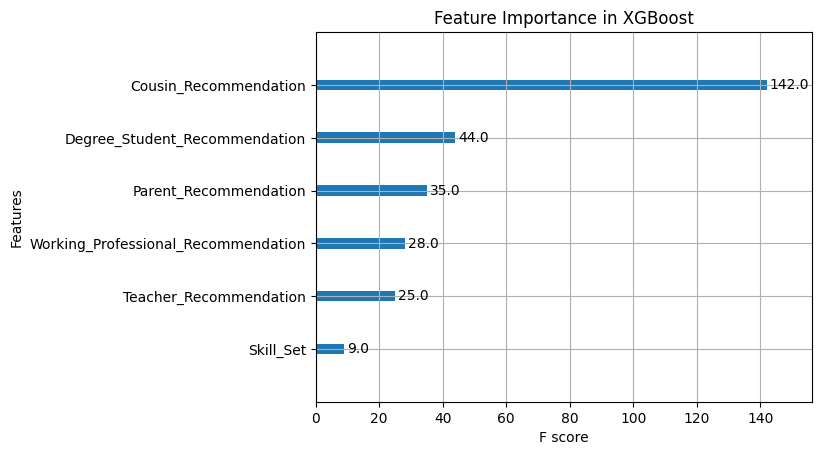

<Figure size 2000x1000 with 0 Axes>

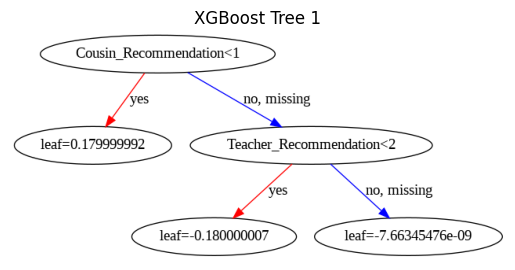

<Figure size 2000x1000 with 0 Axes>

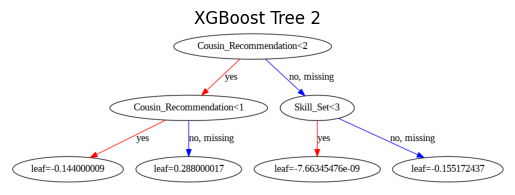

<Figure size 2000x1000 with 0 Axes>

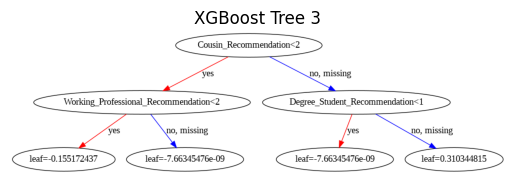

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Create a structured dataset
data = {
    'Student_ID': range(1, 21),
    'Skill_Set': np.random.choice(['Math', 'Science', 'Art', 'Language', 'Sports'], 20),
    'Cousin_Recommendation': np.random.choice(['Science', 'Commerce', 'Arts'], 20),
    'Teacher_Recommendation': np.random.choice(['Science', 'Commerce', 'Arts'], 20),
    'Parent_Recommendation': np.random.choice(['Science', 'Commerce', 'Arts'], 20),
    'Degree_Student_Recommendation': np.random.choice(['Science', 'Commerce', 'Arts'], 20),
    'Working_Professional_Recommendation': np.random.choice(['Science', 'Commerce', 'Arts'], 20),
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Create Final Course based on recommendations to ensure deterministic behavior
def determine_final_course(row):
    recommendations = [
        row['Cousin_Recommendation'],
        row['Teacher_Recommendation'],
        row['Parent_Recommendation'],
        row['Degree_Student_Recommendation'],
        row['Working_Professional_Recommendation']
    ]

    # Count occurrences of each course recommendation
    course_counts = pd.Series(recommendations).value_counts()

    # Return the course with the highest recommendation count (or Science if tied)
    return course_counts.idxmax()

# Apply function to create a deterministic final course
df['Final_Course'] = df.apply(determine_final_course, axis=1)

# Encode categorical features
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Features and target variable
X = df.drop(['Student_ID', 'Final_Course'], axis=1)
y = df['Final_Course']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy: {accuracy:.2f}%')

# Visualize feature importances
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_classifier, importance_type='weight')
plt.title('Feature Importance in XGBoost')
plt.show()

# Visualize trees from the XGBoost model
for i in range(3):
    plt.figure(figsize=(20, 10))
    xgb.plot_tree(xgb_classifier, num_trees=i)
    plt.title(f'XGBoost Tree {i + 1}')
    plt.show()


Accuracy: 95.00%


<Figure size 2000x1000 with 0 Axes>

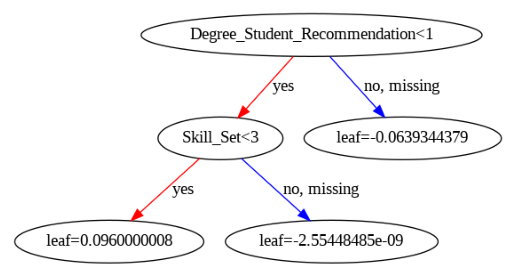

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Create a structured dataset
data = {
    'Student_ID': range(1, 21),
    'Skill_Set': np.random.choice(['Math', 'Science', 'Art', 'Language', 'Sports'], 20),
    'Cousin_Recommendation': np.random.choice(['Science', 'Commerce', 'Arts'], 20),
    'Teacher_Recommendation': np.random.choice(['Science', 'Commerce', 'Arts'], 20),
    'Parent_Recommendation': np.random.choice(['Science', 'Commerce', 'Arts'], 20),
    'Degree_Student_Recommendation': np.random.choice(['Science', 'Commerce', 'Arts'], 20),
    'Working_Professional_Recommendation': np.random.choice(['Science', 'Commerce', 'Arts'], 20),
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Create Final Course based on recommendations to ensure deterministic behavior
def determine_final_course(row):
    recommendations = [
        row['Cousin_Recommendation'],
        row['Teacher_Recommendation'],
        row['Parent_Recommendation'],
        row['Degree_Student_Recommendation'],
        row['Working_Professional_Recommendation']
    ]

    # Count occurrences of each course recommendation
    course_counts = pd.Series(recommendations).value_counts()

    # Return the course with the highest recommendation count (or Science if tied)
    return course_counts.idxmax()

# Apply function to create a deterministic final course
df['Final_Course'] = df.apply(determine_final_course, axis=1)

# Encode categorical features
df['Skill_Set'] = df['Skill_Set'].astype('category').cat.codes
df['Cousin_Recommendation'] = df['Cousin_Recommendation'].astype('category').cat.codes
df['Teacher_Recommendation'] = df['Teacher_Recommendation'].astype('category').cat.codes
df['Parent_Recommendation'] = df['Parent_Recommendation'].astype('category').cat.codes
df['Degree_Student_Recommendation'] = df['Degree_Student_Recommendation'].astype('category').cat.codes
df['Working_Professional_Recommendation'] = df['Working_Professional_Recommendation'].astype('category').cat.codes
df['Final_Course'] = df['Final_Course'].astype('category').cat.codes

# Features and target variable
X = df.drop(['Student_ID', 'Final_Course'], axis=1)
y = df['Final_Course']

# Convert the features to DMatrix format required by XGBoost
dtrain = xgb.DMatrix(X, label=y)

# Set parameters for XGBoost
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'max_depth': 3,
    'eta': 0.1,
    'seed': 42
}

# Train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=10)

# Check accuracy
preds = xgb_model.predict(dtrain)
accuracy = np.sum(preds == y) / len(y) * 100
print(f'Accuracy: {accuracy:.2f}%')

# Visualize one tree from the XGBoost model
plt.figure(figsize=(20, 10))
plot_tree(xgb_model, num_trees=0, title='XGBoost Tree Representation')
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Expanded sample dataset
data = {
    "Skills": ["Mathematics", "Science", "Arts", "Technology", "Mathematics", "Arts", "Science", "Technology", "Mathematics", "Arts"] * 10,
    "Interest": ["Engineering", "Medicine", "Design", "IT", "Finance", "Media", "Research", "IT", "Engineering", "Design"] * 10,
    "Course_Suggested": [
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts"
    ],
    "Job_Opportunities": ["High", "High", "Moderate", "High", "Moderate", "Moderate", "High", "High", "High", "Moderate"] * 10,
    "Course_Fee": [50000, 60000, 30000, 55000, 20000, 25000, 40000, 55000, 50000, 30000] * 10,
    "Final_Course": ["Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts"] * 10
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Encode categorical variables
df['Skills'] = df['Skills'].astype('category').cat.codes
df['Interest'] = df['Interest'].astype('category').cat.codes
df['Course_Suggested'] = df['Course_Suggested'].astype('category').cat.codes
df['Job_Opportunities'] = df['Job_Opportunities'].astype('category').cat.codes
df['Final_Course'] = df['Final_Course'].astype('category').cat.codes

# Features and Labels
X = df[['Skills', 'Interest', 'Course_Suggested', 'Job_Opportunities', 'Course_Fee']]
y = df['Final_Course']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the AdaBoost Classifier
ada_boost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_boost.fit(X_train, y_train)

# Make predictions
y_pred = ada_boost.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Initial Dataset (first 5 entries):")
print(df.head())
print("\nFinal Dataset (first 5 entries after predictions):")
print(X_test.head())
print("\nAccuracy of AdaBoost Classifier:", accuracy)


Initial Dataset (first 5 entries):
   Skills  Interest  Course_Suggested  Job_Opportunities  Course_Fee  \
0       1         1                 3                  0       50000   
1       2         5                 5                  0       60000   
2       0         0                 0                  1       30000   
3       3         3                 2                  0       55000   
4       1         2                 1                  1       20000   

   Final_Course  
0             3  
1             5  
2             0  
3             2  
4             1  

Final Dataset (first 5 entries after predictions):
    Skills  Interest  Course_Suggested  Job_Opportunities  Course_Fee
83       3         3                 2                  0       55000
53       3         3                 2                  0       55000
70       1         1                 3                  0       50000
45       0         4                 4                  1       25000
44       1         2  

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Expanded sample dataset
data = {
    "Skills": ["Mathematics", "Science", "Arts", "Technology", "Mathematics", "Arts", "Science", "Technology", "Mathematics", "Arts"] * 10,
    "Interest": ["Engineering", "Medicine", "Design", "IT", "Finance", "Media", "Research", "IT", "Engineering", "Design"] * 10,
    "Course_Suggested": [
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts",
        "Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts"
    ],
    "Job_Opportunities": ["High", "High", "Moderate", "High", "Moderate", "Moderate", "High", "High", "High", "Moderate"] * 10,
    "Course_Fee": [50000, 60000, 30000, 55000, 20000, 25000, 40000, 55000, 50000, 30000] * 10,
    "Final_Course": ["Engineering", "Medicine", "Arts", "Computer Science", "Commerce", "Journalism", "Science", "Computer Science", "Engineering", "Arts"] * 10
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Encode categorical variables
df['Skills'] = df['Skills'].astype('category').cat.codes
df['Interest'] = df['Interest'].astype('category').cat.codes
df['Course_Suggested'] = df['Course_Suggested'].astype('category').cat.codes
df['Job_Opportunities'] = df['Job_Opportunities'].astype('category').cat.codes
df['Final_Course'] = df['Final_Course'].astype('category').cat.codes

# Features and Labels
X = df[['Skills', 'Interest', 'Course_Suggested', 'Job_Opportunities', 'Course_Fee']]
y = df['Final_Course']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the AdaBoost Classifier
ada_boost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_boost.fit(X_train, y_train)

# Make predictions with AdaBoost
y_pred_ada = ada_boost.predict(X_test)

# Calculate accuracy for AdaBoost
accuracy_ada = accuracy_score(y_test, y_pred_ada)

# Create and train the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=50, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred_rf = random_forest.predict(X_test)

# Calculate accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Combine predictions for tabulation
results = pd.DataFrame({
    "Skills": X_test['Skills'],
    "Interest": X_test['Interest'],
    "Course_Suggested": X_test['Course_Suggested'],
    "Job_Opportunities": X_test['Job_Opportunities'],
    "Course_Fee": X_test['Course_Fee'],
    "AdaBoost_Prediction": y_pred_ada,
    "RandomForest_Prediction": y_pred_rf
})

# Print results
print("Initial Dataset (first 5 entries):")
print(df.head())
print("\nFinal Dataset with Predictions (first 5 entries):")
print(results.head())
print("\nAccuracy of AdaBoost Classifier:", accuracy_ada)
print("Accuracy of Random Forest Classifier:", accuracy_rf)

# Tabulate accuracies
accuracy_table = pd.DataFrame({
    "Model": ["AdaBoost", "Random Forest"],
    "Accuracy": [accuracy_ada, accuracy_rf]
})

print("\nModel Accuracy Table:")
print(accuracy_table)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Initial Dataset (first 5 entries):
   Skills  Interest  Course_Suggested  Job_Opportunities  Course_Fee  \
0       1         1                 3                  0       50000   
1       2         5                 5                  0       60000   
2       0         0                 0                  1       30000   
3       3         3                 2                  0       55000   
4       1         2                 1                  1       20000   

   Final_Course  
0             3  
1             5  
2             0  
3             2  
4             1  

Final Dataset with Predictions (first 5 entries):
    Skills  Interest  Course_Suggested  Job_Opportunities  Course_Fee  \
83       3         3                 2                  0       55000   
53       3         3                 2                  0       55000   
70       1         1                 3                  0       50000   
45       0         4                 4                  1       25000   
44      